# Minimal CNN for 28x28 Handwritten Digit

This notebook will:
- Use a single 3x3 convolution kernel (stride=1, no padding)
- Maxpool with 2x2 window (stride=2)
- Flatten, then send to a single Dense (hidden) layer and output layer
- Save the 9 kernel weights and bias to kernel.txt
- Save all Dense layer weights and biases to dense.txt
This is for learning purposes!

2025-09-13 16:40:21.504859: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-13 16:40:21.571721: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-13 16:40:23.189754: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


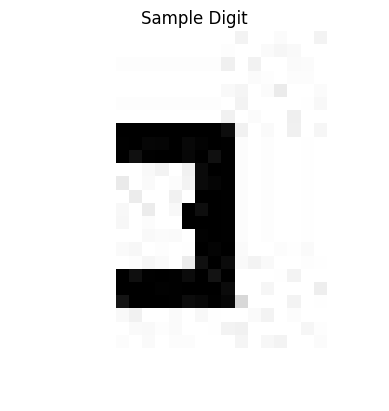

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# If you have your own image, replace 'sample_digit.jpg' loading code later
def create_sample_digit(digit=3, save_path='sample_digit.jpg'):
    img = np.ones((28,28), dtype=np.uint8) * 255
    # crude 3
    img[7:21,14:17] = 0
    img[7:10,8:14] = 0
    img[18:21,8:14] = 0
    img[13:15,13:17] = 0
    Image.fromarray(img).save(save_path)
create_sample_digit()

img = Image.open('sample_digit.jpg').convert('L')
arr = np.array(img).astype(np.float32)/255.0
plt.imshow(arr, cmap='gray')
plt.title('Sample Digit')
plt.axis('off')
plt.show()
# Add batch + channel dims
X = arr.reshape(1,28,28,1)
y = np.array([3]) # label is '3', change as needed

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(1, (3,3), strides=(1,1), activation='relu', padding='valid', name='conv'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu', name='dense1'),
    tf.keras.layers.Dense(10, activation='softmax', name='dense2')
])
model.summary()

E0000 00:00:1757761866.108655    9301 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1757761866.115266    9301 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv (Conv2D)                   │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 8)              │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,460 (5.70 KB)

 Trainable params: 1,460 (5.70 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train on the 1 image, for proof of concept
model.fit(X, y, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step - accuracy: 0.0000e+00 - loss: 3.0617
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 2.8592
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 2.6715
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 2.4991
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 2.3423
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 2.2936
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 2.2918
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 2.2900
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.2883
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 2.2865
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 2.2847
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.

In [4]:
# Save Conv2D kernel (weights + bias)
conv_layer = model.get_layer('conv')
kernel, bias = conv_layer.get_weights() # kernel shape (3,3,1,1), bias (1,)
kernel_vals = kernel[:,:,0,0].flatten() # flatten 3x3
with open('kernel.txt', 'w') as f:
    for w in kernel_vals:
        f.write(f'{w:.8f}\n')
    f.write(f'bias:{bias[0]:.8f}\n')
print('Saved kernel weights and bias to kernel.txt')

Saved kernel weights and bias to kernel.txt


In [5]:
# Save Dense weights and biases
dense1 = model.get_layer('dense1')
dense2 = model.get_layer('dense2')
w1, b1 = dense1.get_weights()
w2, b2 = dense2.get_weights()
with open('dense.txt', 'w') as f:
    f.write('# dense1 weights\n')
    for row in w1:
        f.write(' '.join(f'{x:.8f}' for x in row)+'\n')
    f.write('# dense1 bias\n')
    f.write(' '.join(f'{b:.8f}' for b in b1)+'\n')
    f.write('# dense2 weights\n')
    for row in w2:
        f.write(' '.join(f'{x:.8f}' for x in row)+'\n')
    f.write('# dense2 bias\n')
    f.write(' '.join(f'{b:.8f}' for b in b2)+'\n')
print('Saved dense weights and biases to dense.txt')

Saved dense weights and biases to dense.txt


In [8]:
# Get convolution output - SIMPLE METHOD
conv_layer = model.get_layer('conv')

# Apply convolution layer directly to input
conv_output = conv_layer(X)

# Convert to numpy and remove batch/channel dims
conv_img = conv_output.numpy()[0,:,:,0]  # Shape: (26, 26)

# Save to text file
with open('conv_output.txt', 'w') as f:
    for row in conv_img:
        f.write(' '.join(f'{x:.8f}' for x in row) + '\n')

print(f'Saved convolution output to conv_output.txt')


Saved convolution output to conv_output.txt
